In [1]:
from utils import extract_from_mnist, visualize_data
from train import prep_data,create_model,training_loop,eval_test,eval_train, plot_losses,visualize_weights_and_signs
from adv_attack import adv_attack,create_adv_test

# 1\ Logistic regression

### Data Extraction

In [2]:
filtered_data = extract_from_mnist() # to extract the 3s and 7s from the MNIST dataset

Filtered dataset shape: (14434, 785)
Labels: 0        3
1        3
2        3
3        7
4        3
        ..
14429    3
14430    7
14431    3
14432    7
14433    3
Name: target, Length: 14434, dtype: int64


### Quick visualization

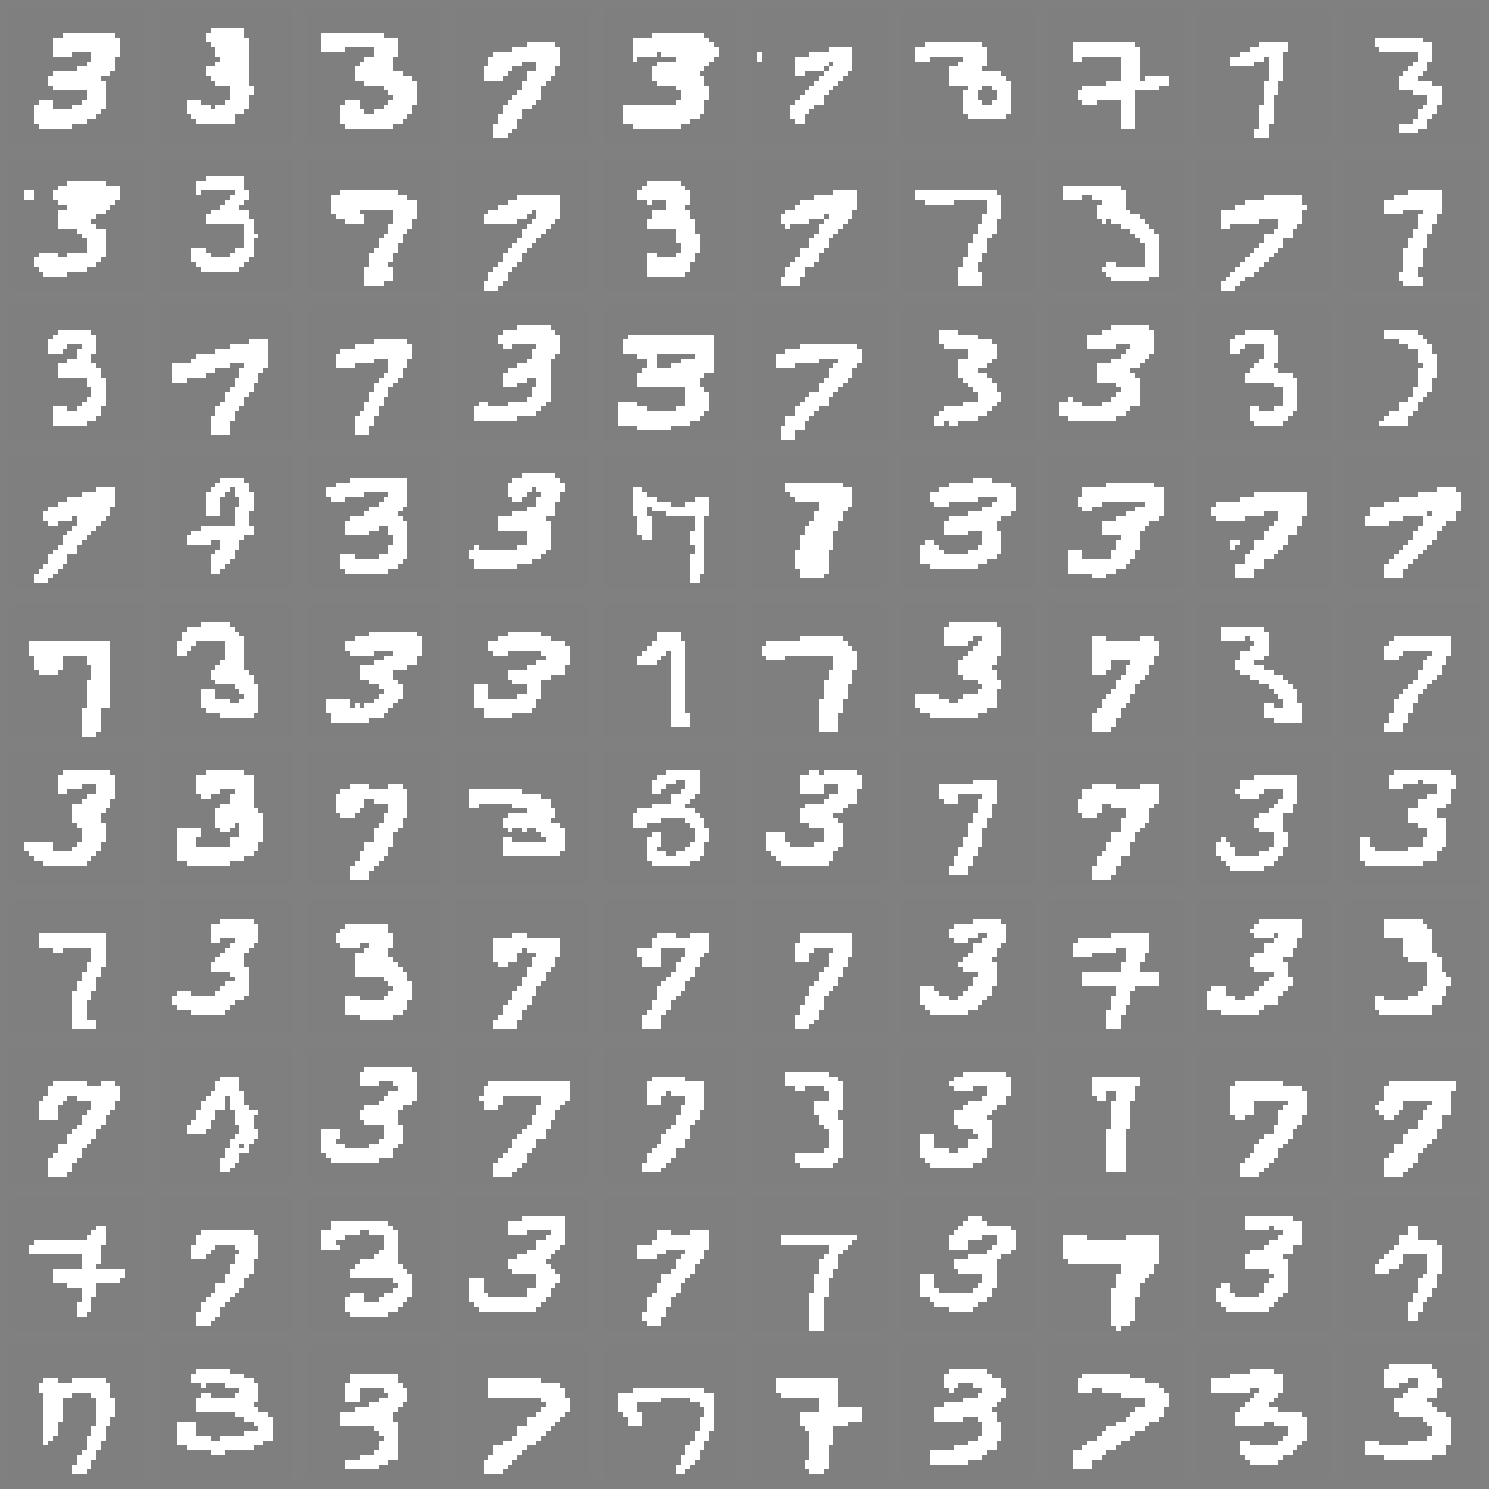

In [3]:
num_rows = 10
num_cols = 10
visualize_data(num_rows,num_cols,filtered_data) # to visualize the data

### Data preparation and model creation

In [4]:
X_train_tensor,y_train_tensor,X_test_tensor,y_test_tensor,num_classes= prep_data(filtered_data)
# to prepare the data for the training

Unique classes in target labels: 2


In [5]:
model,criterion, optimizer =create_model(X_train_tensor,num_classes,0.001)
# to create the linear model and get the criterion and optimizer


### Training Loop and performance 

In [6]:
training_loss ,model_trained = training_loop(optimizer, model, criterion, X_train_tensor, y_train_tensor,num_epochs=200,batch_size=32)
# to train the model

Epoch [1/200], Loss: 0.2806
Epoch [2/200], Loss: 0.1857
Epoch [3/200], Loss: 0.3112
Epoch [4/200], Loss: 0.1177
Epoch [5/200], Loss: 0.1492
Epoch [6/200], Loss: 0.1379
Epoch [7/200], Loss: 0.0628
Epoch [8/200], Loss: 0.0611
Epoch [9/200], Loss: 0.1257
Epoch [10/200], Loss: 0.0728
Epoch [11/200], Loss: 0.1269
Epoch [12/200], Loss: 0.1078
Epoch [13/200], Loss: 0.1697
Epoch [14/200], Loss: 0.1877
Epoch [15/200], Loss: 0.0613
Epoch [16/200], Loss: 0.0478
Epoch [17/200], Loss: 0.0500
Epoch [18/200], Loss: 0.0781
Epoch [19/200], Loss: 0.0494
Epoch [20/200], Loss: 0.0555
Epoch [21/200], Loss: 0.1159
Epoch [22/200], Loss: 0.1107
Epoch [23/200], Loss: 0.0867
Epoch [24/200], Loss: 0.1191
Epoch [25/200], Loss: 0.2030
Epoch [26/200], Loss: 0.0384
Epoch [27/200], Loss: 0.0674
Epoch [28/200], Loss: 0.0440
Epoch [29/200], Loss: 0.0399
Epoch [30/200], Loss: 0.0385
Epoch [31/200], Loss: 0.3002
Epoch [32/200], Loss: 0.0798
Epoch [33/200], Loss: 0.0600
Epoch [34/200], Loss: 0.0343
Epoch [35/200], Loss: 0

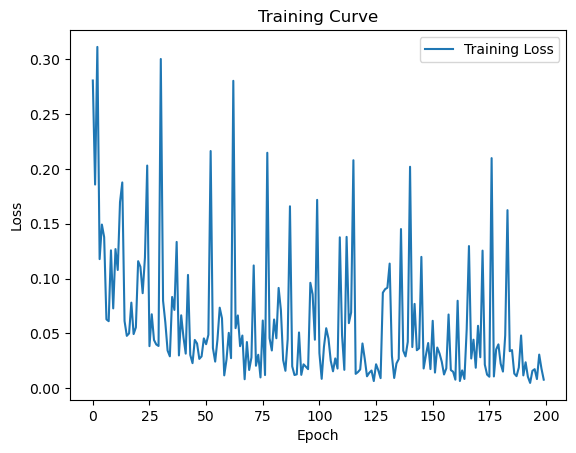

In [7]:
plot_losses(training_loss) # to plot the training loss

In [8]:
eval_train(X_train_tensor,y_train_tensor,model_trained) # to evaluate the model on the training set

Training Accuracy: 98.68%


### Weight Visualisation

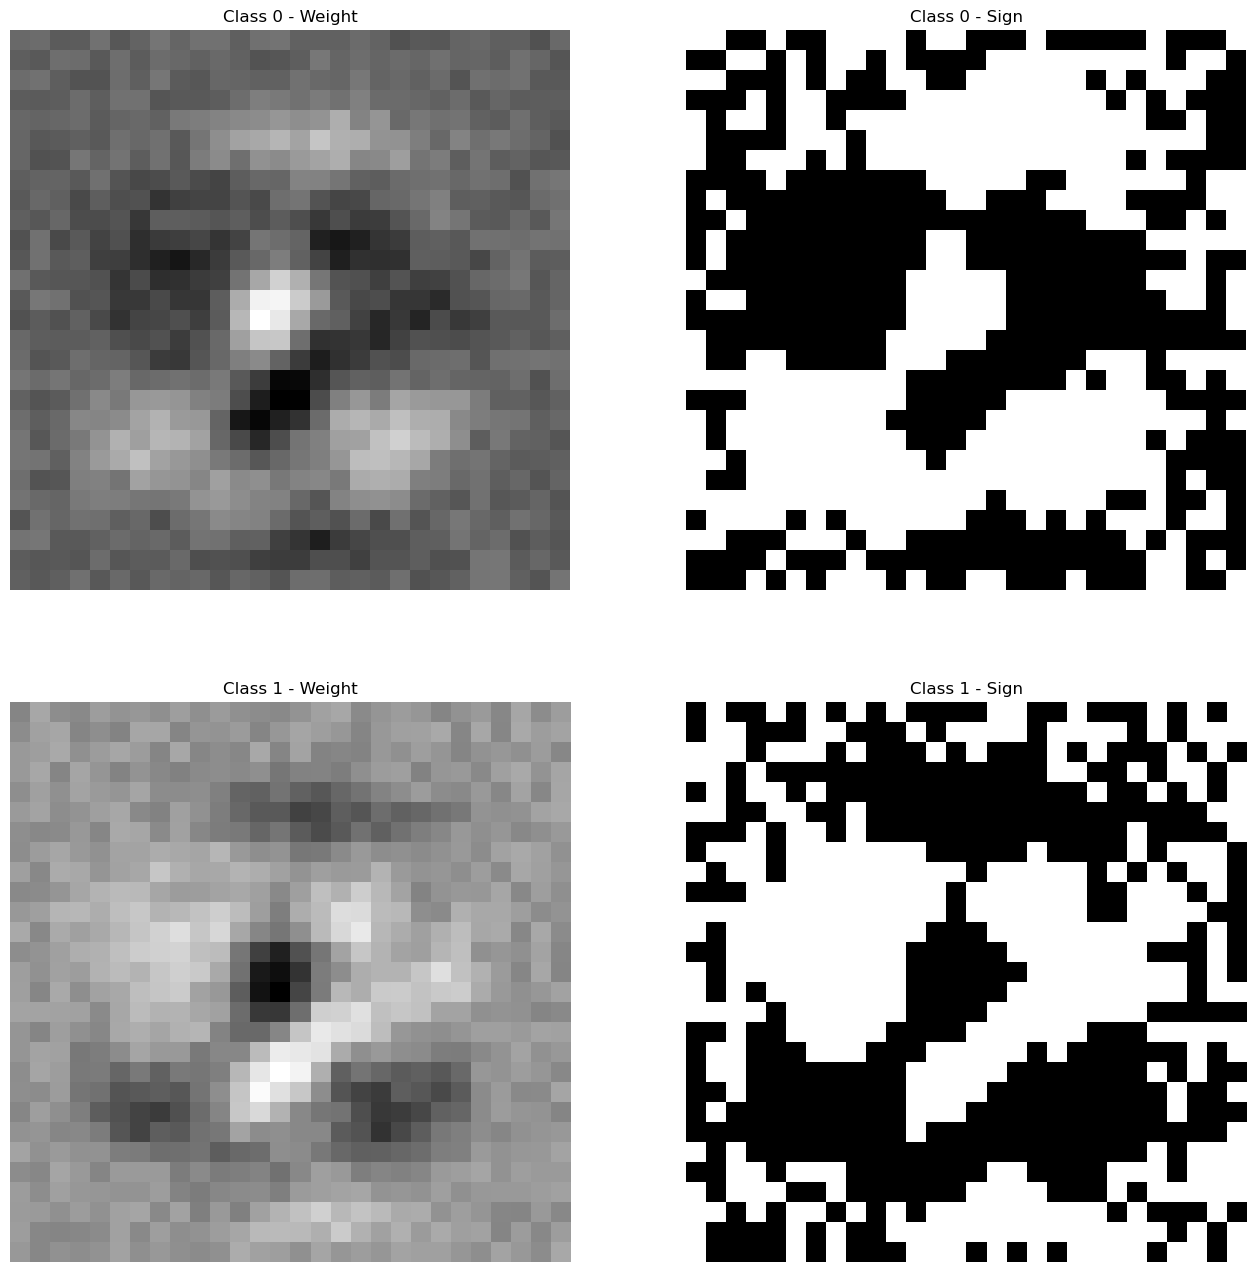

In [9]:

visualize_weights_and_signs(model_trained) # to visualize the weights and signs of the model

# 2\ Logistic regression Vs Adversarial

### Test set for original images

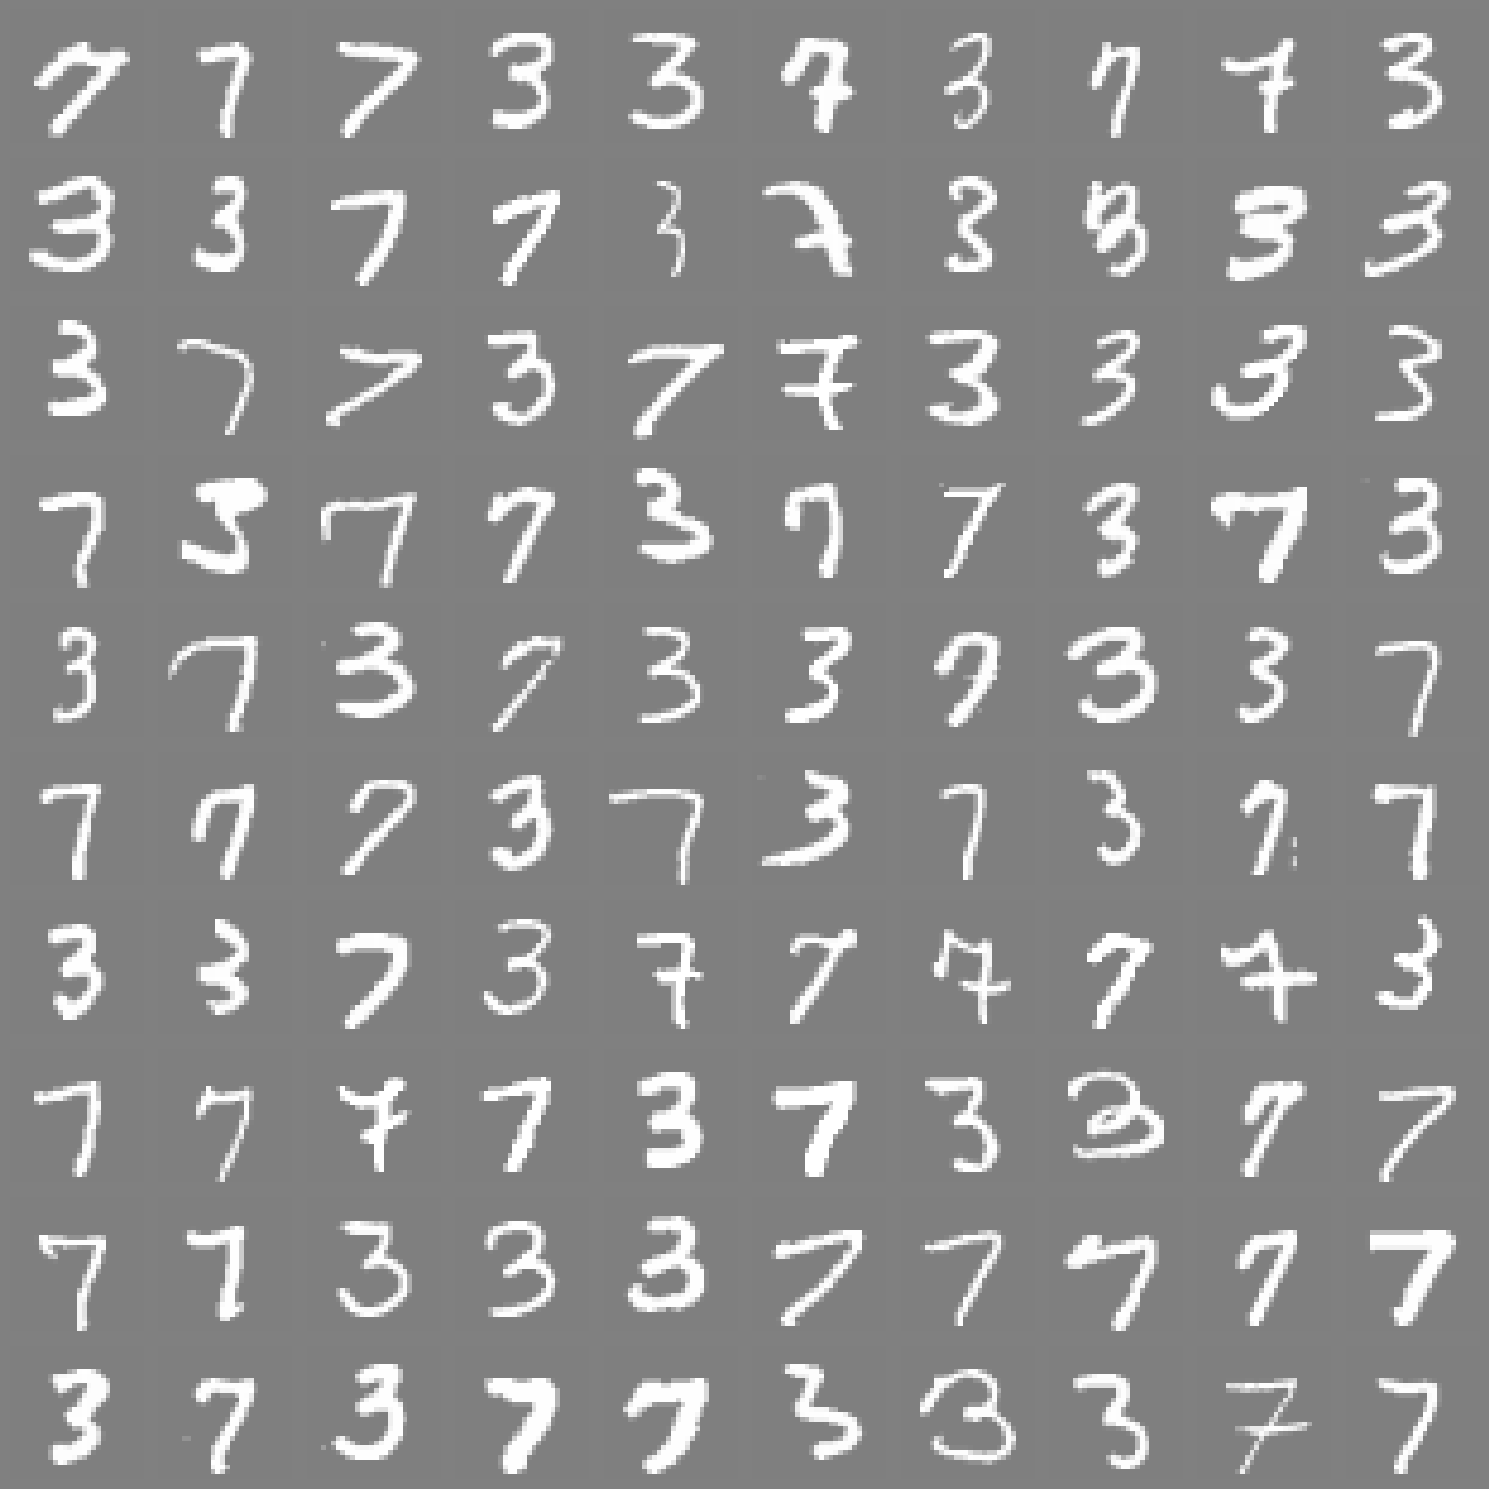

In [10]:

X_test_tensor2 = X_test_tensor.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor2) # to visualize the test data

### Evaluation of the model on the unaltered test set

In [11]:
eval_test(X_test_tensor,y_test_tensor,model_trained) # to evaluate the model on the test set

Test Accuracy: 98.48%


### Creation of the adversarial test set

In [14]:
eps = 0.25
X_test_tensor_adv = create_adv_test(model_trained,X_test_tensor,y_test_tensor,eps,criterion) # to create the adversarial test set

/home/spi-2019/Téléchargements/Tpworkspace/MLA_proj/adv_attack.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alt_im_norm =torch.tensor(alt_im, dtype=torch.float32)


### Visualization of the altered test set 

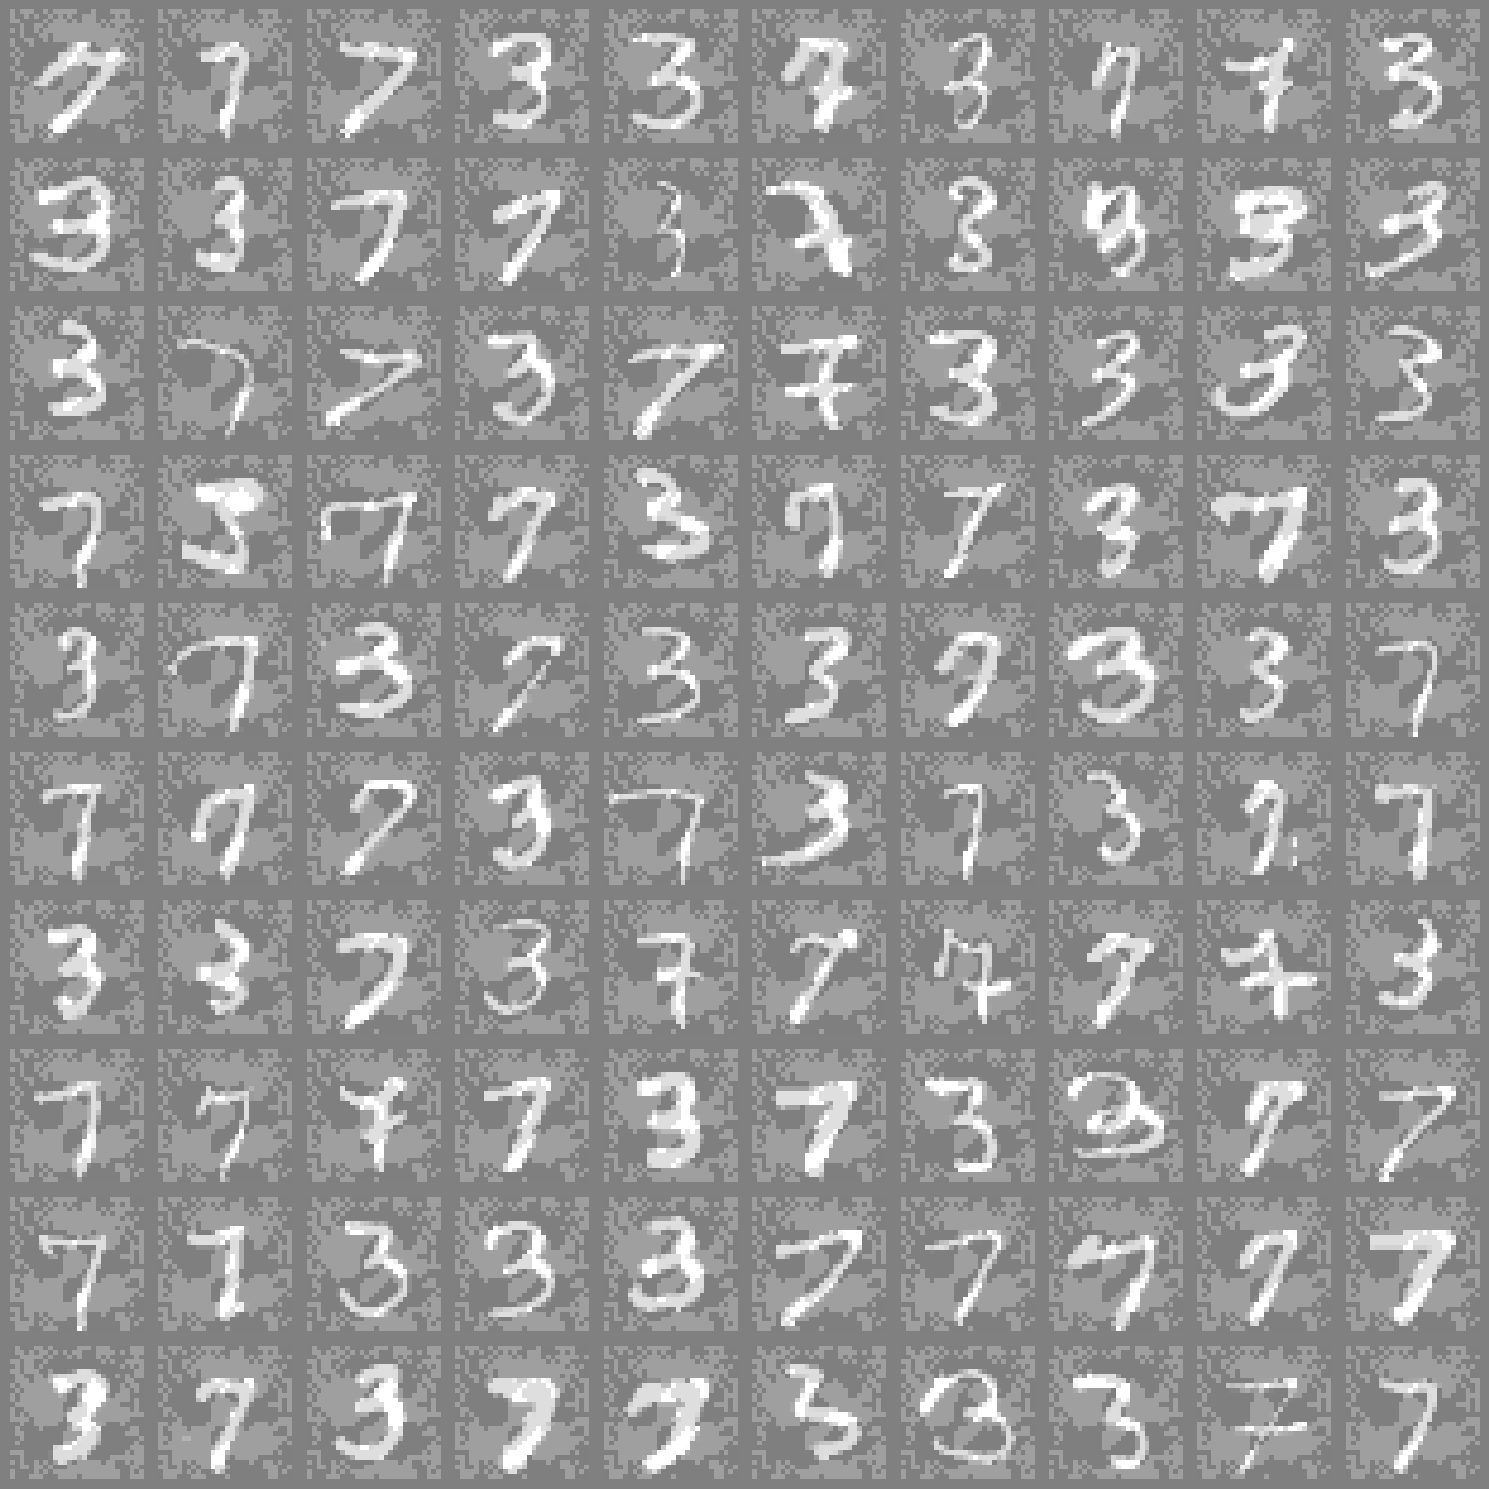

In [15]:
X_test_tensor_adv2 = X_test_tensor_adv.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor_adv2) # to visualize the adversarial test set

### Evaluation of the model on the altered test set 

In [17]:
eval_test(X_test_tensor_adv,y_test_tensor,model_trained) # to evaluate the model on the adversarial test set

Test Accuracy: 5.40%
